In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/elections/GE_2024_Results (1).csv")

In [4]:
df.shape

(8906, 10)

In [5]:
df.head(20)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
9,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost


In [6]:
df = df.drop("ID",axis = 1)

In [7]:
df = df.dropna().reset_index(drop = True)
df.shape

(8902, 9)

In [8]:
telangana_candidates = df.loc[df["State"] == "Telangana"]
top_5_largest = telangana_candidates.nlargest(5,"Total Votes")
#setting index values from 1 to 5 
top_5_largest.index = [x  for x in range(1,6)]
print(top_5_largest[["Candidate","Total Votes"]])

                    Candidate  Total Votes
1             EATALA RAJENDER     991042.0
2     KONDA VISHWESHWAR REDDY     809882.0
3           KUNDURU RAGHUVEER     784337.0
4  RAMASAHAYAM RAGHURAM REDDY     766929.0
5            ASADUDDIN OWAISI     661981.0


In [9]:
total_votes = df.groupby(by = "State")["Total Votes"].sum()
print("Total votes received by each state")
total_votes

Total votes received by each state


State
Andaman & Nicobar Islands                 202514.0
Andhra Pradesh                          33729342.0
Arunachal Pradesh                         723247.0
Assam                                   20059870.0
Bihar                                   43448949.0
Chandigarh                                449275.0
Chhattisgarh                            15061348.0
Dadra & Nagar Haveli and Daman & Diu      297998.0
Goa                                       906538.0
Gujarat                                 29115599.0
Haryana                                 13055572.0
Himachal Pradesh                         4069906.0
Jammu and Kashmir                        5151193.0
Jharkhand                               17241982.0
Karnataka                               38793617.0
Kerala                                  19980436.0
Ladakh                                    135524.0
Lakshadweep                                49200.0
Madhya Pradesh                          37940251.0
Maharashtra              

In [10]:
print("Total % of votes received : \n")
for state,state_df in df.groupby(by = "State"):
    sum = df["Total Votes"].sum()
    print(f"{state}  :  {(state_df['Total Votes'].sum()/sum)*100}%\n")

Total % of votes received : 

Andaman & Nicobar Islands  :  0.03137983744957851%

Andhra Pradesh  :  5.226410367881931%

Arunachal Pradesh  :  0.11206816958775842%

Assam  :  3.1083058942081854%

Bihar  :  6.732477542170055%

Chandigarh  :  0.06961581159899752%

Chhattisgarh  :  2.3337776746868584%

Dadra & Nagar Haveli and Daman & Diu  :  0.04617522146764913%

Goa  :  0.1404693753610417%

Gujarat  :  4.511504211398276%

Haryana  :  2.022979780021473%

Himachal Pradesh  :  0.6306378261012289%

Jammu and Kashmir  :  0.7981848119705635%

Jharkhand  :  2.6716700695683193%

Karnataka  :  6.011127109934155%

Kerala  :  3.095997480923327%

Ladakh  :  0.020999639978059186%

Lakshadweep  :  0.007623611219566364%

Madhya Pradesh  :  5.878896812942356%

Maharashtra  :  8.859989428127587%

Manipur  :  0.24693558526544682%

Meghalaya  :  0.2652717648115319%

Mizoram  :  0.076133224434489%

NCT OF Delhi  :  1.384963630842153%

Nagaland  :  0.11788644149189455%

Odisha  :  3.893778954275912%

Puduch

In [11]:
#reset_index returns a dataframe otherwise doing it only till sum() returns a series and then we get error when we perform nlargest on it
totalParty = df.groupby(by = "Party")["Total Votes"].sum().reset_index()
top_5_party = totalParty.nlargest(5,"Total Votes")
top_5_party.index = [x for x in range(1,6)]
top_5_party

,Party,Total Votes
1,Bharatiya Janata Party,235973935.0
2,Indian National Congress,136759064.0
3,Samajwadi Party,29549381.0
4,All India Trinamool Congress,28213393.0
5,Independent,17844442.0


In [12]:
#if we dont do .copy() shows error : A value is trying to be set on a copy of a slice from a DataFrame.
lost_candidates = df.loc[df["Result"] == "Lost"].copy()
lost_candidates["% of Votes"] = pd.to_numeric(lost_candidates["% of Votes"])
top_10_lost = lost_candidates.nlargest(10,"% of Votes")
top_10_lost.index = [x for x in range(1,11)]
print(top_10_lost[["Candidate","% of Votes"]])

                    Candidate  % of Votes
1                 ANIL CHOPRA       48.83
2        SHUBHKARAN CHOUDHARY       47.81
3          DR. UMESH G JADHAV       47.70
4               SANJAY TANDON       47.67
5            MANSOOR ALI KHAN       47.57
6       BHAMRE SUBHASH RAMRAO       47.57
7                  ALOK MISRA       47.56
8          PRAVEEN SINGH ARON       47.55
9   ANANDSWAMY GADDADEVARMATH       47.43
10      AMOL GAJANAN KIRTIKAR       47.40


               Candidate  Total Votes
1                   NOTA    6372220.0
2        RAKIBUL HUSSAIN    1471885.0
3           RAHUL GANDHI    1335094.0
4        SHANKAR LALWANI    1226751.0
5  SHIVRAJ SINGH CHOUHAN    1116460.0


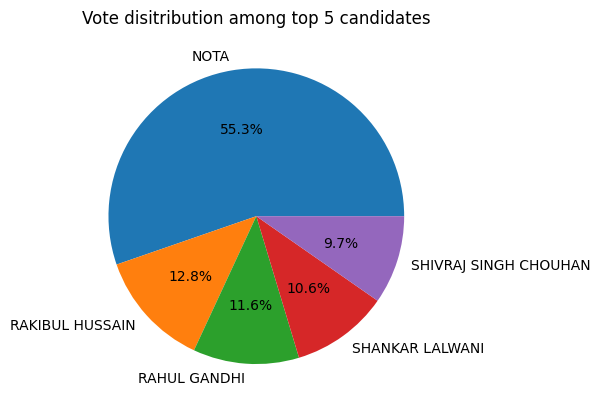

In [13]:

candidates = df.groupby("Candidate")["Total Votes"].sum().reset_index()
top_5_candidates = candidates.nlargest(5,"Total Votes")
top_5_candidates.index = [x for x in range(1,6)]
print(top_5_candidates)
plt.pie(top_5_candidates["Total Votes"],labels = top_5_candidates["Candidate"],autopct = "%0.1f%%")
plt.title("Vote disitribution among top 5 candidates")
plt.show()

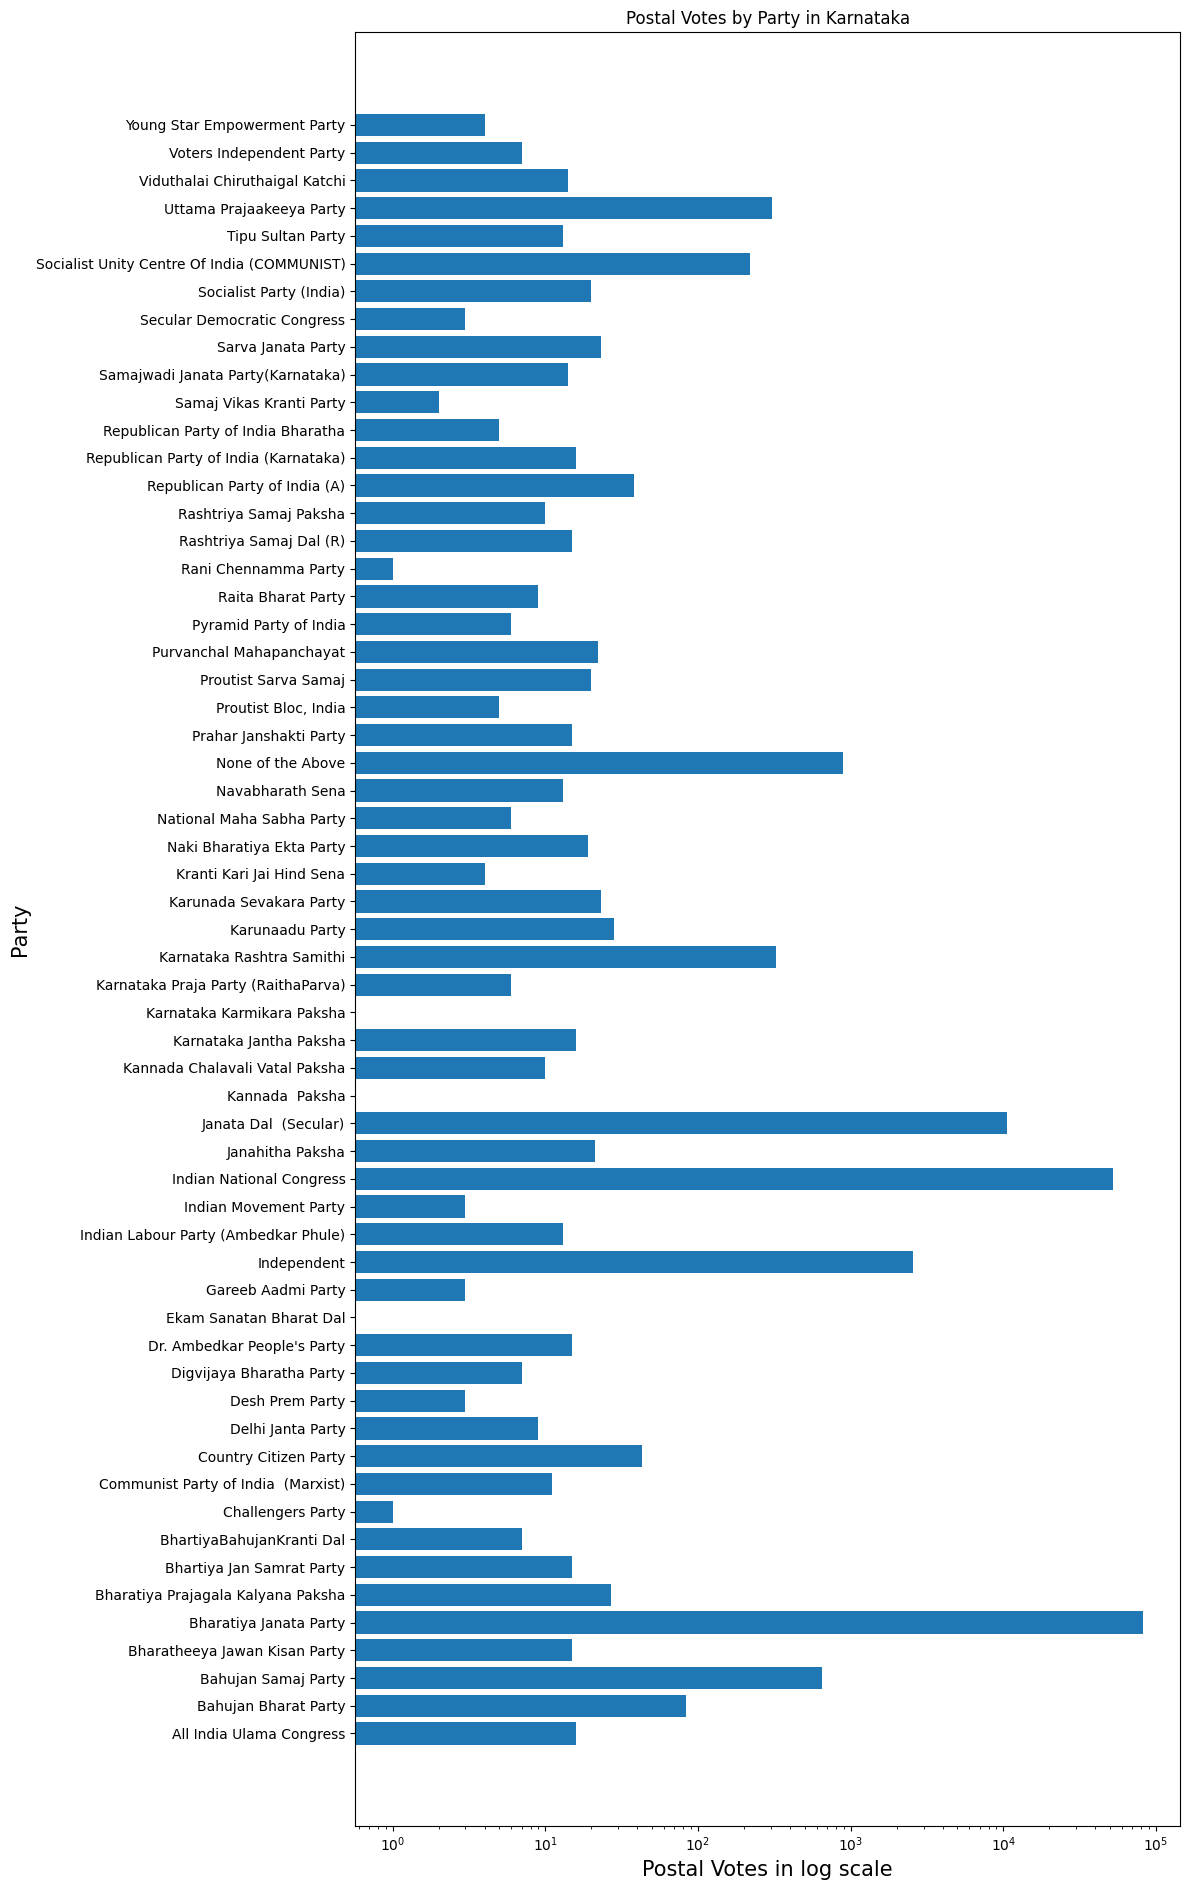

In [14]:
parties_karnataka = df.loc[df["State"] == "Karnataka"].copy()
parties_karnataka["Postal Votes"] = pd.to_numeric(parties_karnataka["Postal Votes"], errors='coerce')
coastal = parties_karnataka.groupby(by = "Party")["Postal Votes"].sum().reset_index()

plt.figure(figsize=(12, 19))  

plt.barh(coastal["Party"], coastal["Postal Votes"])

plt.xscale('log')
#using log to make all values visible because some votes are too large and some too small 
plt.title("Postal Votes by Party in Karnataka")
plt.xlabel("Postal Votes in log scale",size = 15)
plt.ylabel("Party",size = 15)
plt.tight_layout()
plt.show()